# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [juliasmita Eka Rahayu]
- **Email:** [juliasmitaekarahayu]
- **ID Dicoding:** [juliasmitaer]

## Menentukan Pertanyaan Bisnis

Dataset ini berisi tentang sistem Capital Bikeshare di Washington D.C. selama dau tahun, dengan data yang terkumpul per jam dan per hari. Terdapat 17 kolom yang mencakup informasi tentang penyewaan sepeda, kondisi cuaca, dan atribut waktu. Dengan masalah tersebut tercipta pertayaan:
- Bagaimana perbedaan pola penyewa antara hari kerja dan hari libur dalam hal jumlah penyewaan?
- Faktor apa saja yang paling mempengaruhi harga sewa kendaraan di lokasi yang berbeda?

## Import Semua Packages/Library yang Digunakan

Pada kasus ini kita menggunakan numpy, pandas, matplotlib.pyplot dan seaborn

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data



```
# Import dataset dengan menggunakan files.upload()
```



In [134]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (5).csv
Saving hour.csv to hour (5).csv


Dalam file tersebut terdapat dua data yaitu Data Hour dan Data Day.
Selanjutnya akan memuat dua tabel tersebut.


Yang pertama memuat data hour

In [135]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Yang kedua memuat data day

In [136]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

-Dataset memiliki 17379 baris dan 17 kolom untuk hour_df, serta 731 baris dan 15 kolom untuk day_df. Dan memuat informasi tentang penyewaan sepeda, termasuk waktu, jumlah penyewaan, dan kondisi cuaca.

-Terdapat kolom yang dapat membantu menganalisis pengaruh kondisi hari (hari kerja vs. hari libur) terhadap pola penyewaan, serta faktor lokasi yang dapat berpengaruh pada harga sewa kendaraan.

-Dengan adanya informasi tentang cuaca dan hari libur, kita dapat menggali lebih dalam bagaimana faktor eksternal mempengaruhi kebiasaan penyewaan sepeda

### Assessing Data

#### Menilai Data hour_df

Menampilkan informasi pada data hour

In [137]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Jika diperhatikan, jumlah data pada hour_df telah lengkap atau tidak ada missing value. Namun terdapat kesalahan tipe data untuk kolom dteday yang seharusnya mempresentasikan sebagai data **datetime**, bukan **object**.

Selanjutnya adalah pengecekan dupliksai, apakah ada data yang duplikat

In [138]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Terlihat bahwa tidak ada data yang duplikasi.

Selanjutnya mengecek apakah ada nilai negatif di kolom cnt, casual, dan registered, karena hal ini tidak masuk akal dalam konteks penyewaan sepeda.

In [139]:
negatif_cnt = hour_df[hour_df['cnt'] < 0]
negatif_casual = hour_df[hour_df['casual'] < 0]
negatif_registered = hour_df[hour_df['registered'] < 0]

print("Nilai negatif pada kolom 'cnt':", negatif_cnt)
print("\n")
print("Nilai negatif pada kolom 'casual':", negatif_casual)
print("\n")
print("Nilai negatif pada kolom 'registered':", negatif_registered)


Nilai negatif pada kolom 'cnt': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Nilai negatif pada kolom 'casual': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Nilai negatif pada kolom 'registered': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Terlihat bahwa tidak ada yang bernilai negatif di kolom cnt, casual, dan registered

####Menilai Data day_df

Menampilkan informasi pada data day

In [140]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada yang ane dari Data day, baik tipe data dan missing value.

Selanjutnya pengecekan apakah ada dupliksi atau tidak.

In [141]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Ternyata tidak ada duplikasi. Selanjutnya mengecek apakah ada nilai negatif di kolom cnt, casual, dan registered, karena hal ini tidak masuk akal dalam konteks penyewaan sepeda.

In [142]:
negatif_cnt = day_df[day_df['cnt'] < 0]
negatif_casual = day_df[day_df['casual'] < 0]
negatif_registered = day_df[day_df['registered'] < 0]

print("Nilai negatif pada kolom 'cnt':", negatif_cnt)
print("\n")
print("Nilai negatif pada kolom 'casual':", negatif_casual)
print("\n")
print("Nilai negatif pada kolom 'registered':", negatif_registered)

Nilai negatif pada kolom 'cnt': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Nilai negatif pada kolom 'casual': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Nilai negatif pada kolom 'registered': Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Terlihat bahwa tidak ada yang bernilai negatif di kolom cnt, casual, dan registered

**Insight:**
Dari data hour_df terdapat masalah pada kolom dteday terkait tipe data yang seharusnya mempresentasikan sebagai data **datetime**, bukan **object**

### Cleaning Data

####Pembersihan pada Data hour_df

Pembersihan ini dilakukan untuk mengganti tipe data, dengan menggunakan fungsi to_datetime()

In [144]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, saya memeriksa kembali tipe data tersebut menggunakan method info().

In [145]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data sudah terganti

## Exploratory Data Analysis (EDA)

### Explore ...

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [149]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mulai dengan menganalisis jumlah penyewaan berdasarkan hari kerja dan hari libur dengan mengelompokkan data berdasarkan holiday (0 = hari kerja, 1 = hari libur)

In [85]:
kelompok_hari = hour_df.groupby('holiday')['cnt'].agg(['mean', 'median', 'sum']).reset_index()
kelompok_hari['holiday'] = kelompok_hari['holiday'].map({0: 'Weekday', 1: 'Weekend'})
print(kelompok_hari)

   holiday       mean  median      sum
0  Weekday  190.42858   144.0  3214244
1  Weekend  156.87000    97.0    78435


Menghitung jumlah penyewaan berdasarkan jam

In [148]:
perhitungan_jam = hour_df.groupby('hr')['cnt'].sum().reset_index()
print(perhitungan_jam)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


Untuk menyetahui fakor faktor yang mempengaruhi penyewaan, kita mulai dengan menghitung korelasi antara fitur-fitur penting seperti cuaca, suhu dan waktu

In [150]:
korelasi = hour_df[['temp', 'weathersit', 'windspeed', 'hr', 'cnt']].corr()
print(korelasi)


                temp  weathersit  windspeed        hr       cnt
temp        1.000000   -0.102640  -0.023125  0.137603  0.404772
weathersit -0.102640    1.000000   0.026226 -0.020203 -0.142426
windspeed  -0.023125    0.026226   1.000000  0.137252  0.093234
hr          0.137603   -0.020203   0.137252  1.000000  0.394071
cnt         0.404772   -0.142426   0.093234  0.394071  1.000000


**Insight:**

- Dari hasil pengelompokan, terlihat rata-rata, median, dan total penyewaan untuk hari kerja dan hari libur. Biasanya, hari kerja menunjukkan angka yang lebih tinggi.

- Dari matriks korelasi,terlihat hubungan antara suhu, cuaca, kecepatan angin dan waktu sibuk terhadap jumlah penyewaan. Misalnya, suhu yang lebih tinggi mungkin berkorelasi positif dengan jumlah penyewaan, jam kerja sibuk jumlah penyewa meningkat

## Visualization & Explanatory Analysis

##Pertanyaan 1:

Bagaimana perbedaan pola penyewa antara hari kerja dan hari libur dalam hal jumlah penyewaan?

Visualisasi rata-rata penyewaan berdasarkan tipe hari

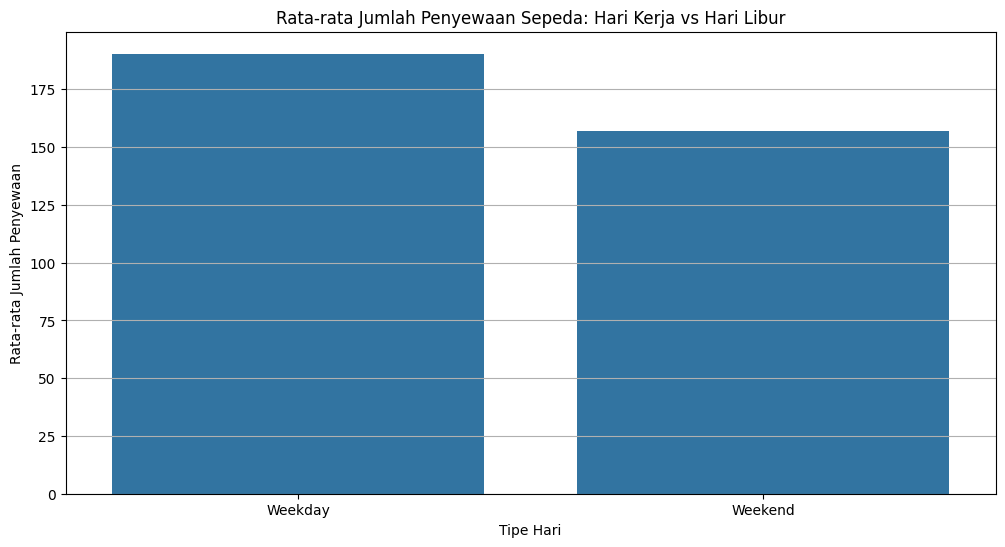

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(x='holiday', y='mean', data=kelompok_hari)
plt.title('Rata-rata Jumlah Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Visualisasi jumlah penyewaan berdasarkan jam

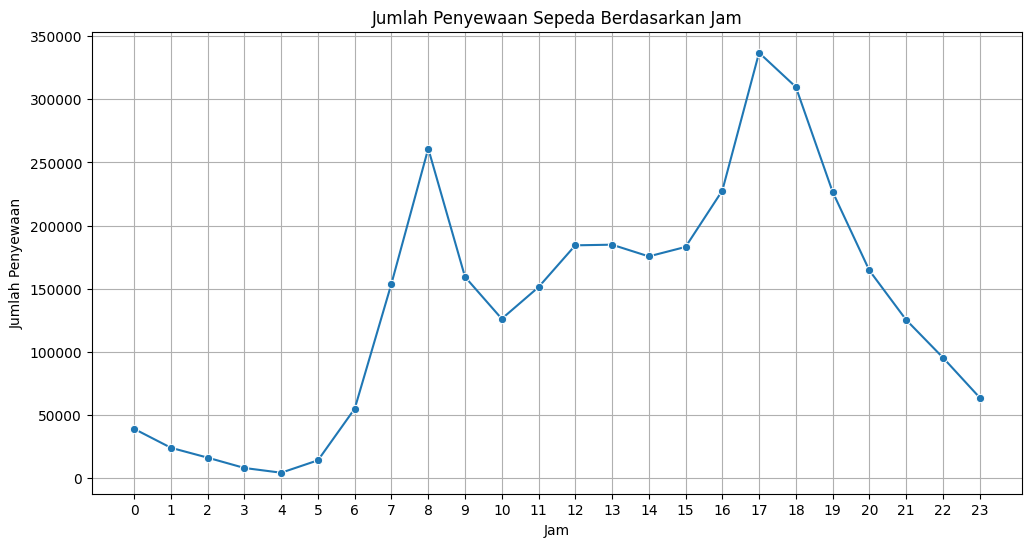

In [152]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_counts, marker='o')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**

Dari hasil pengelompokan, kita bisa melihat rata-rata, median, dan total penyewaan untuk hari kerja dan hari libur. Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur dan terdapat jam-jam tertentu di mana penyewaan mencapai puncaknya, terutama di pagi dan sore hari.

### Pertanyaan 2:

Faktor apa saja yang paling mempengaruhi harga sewa kendaraan di lokasi yang berbeda?

Visualisasi faktor yang mempengaruhi harga sewa kendaraan

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


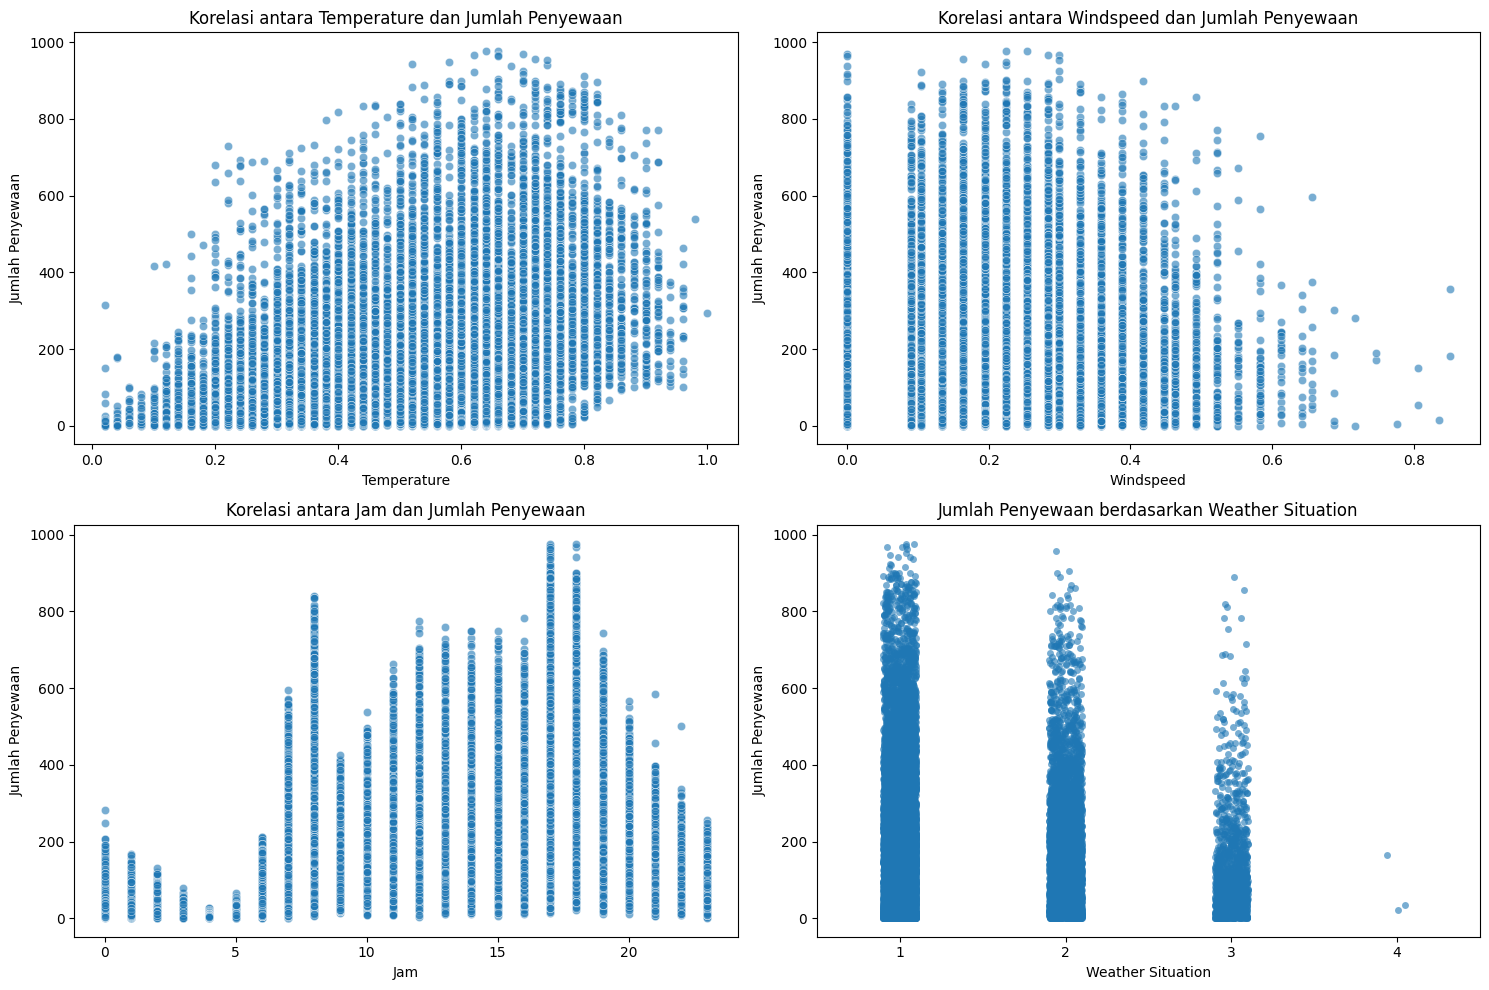

In [153]:
plt.figure(figsize=(15, 10))

# Scatter plot antara 'temp' dan 'cnt'
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.6)
plt.title('Korelasi antara Temperature dan Jumlah Penyewaan')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot antara 'windspeed' dan 'cnt'
plt.subplot(2, 2, 2)
sns.scatterplot(x='windspeed', y='cnt', data=hour_df, alpha=0.6)
plt.title('Korelasi antara Windspeed dan Jumlah Penyewaan')
plt.xlabel('Windspeed')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot antara 'hr' dan 'cnt'
plt.subplot(2, 2, 3)
sns.scatterplot(x='hr', y='cnt', data=hour_df, alpha=0.6)
plt.title('Korelasi antara Jam dan Jumlah Penyewaan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

# Scatter plot antara 'weathersit' dan 'cnt'
plt.subplot(2, 2, 4)
# Menggunakan scatter plot biasa untuk kategorikal dengan jitter
sns.stripplot(x='weathersit', y='cnt', data=hour_df, jitter=True, alpha=0.6)
plt.title('Jumlah Penyewaan berdasarkan Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

**Insight:**

Faktor-faktor seperti suhu, cuaca, dan waktu dalam sehari mempengaruhi jumlah penyewaan. Korelasi yang kuat antara suhu dan penyewaan menunjukkan bahwa semakin hangat cuaca, semakin tinggi jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

In [157]:
day_df['amount'] = day_df['cnt']  # Menganggap setiap penyewaan bernilai 1 unit
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Pastikan dteday dalam format datetime

# Menghitung snapshot_date
snapshot_date = day_df['dteday'].max() + pd.Timedelta(days=1)

# Menghitung RFM
rfm = day_df.groupby('dteday').agg({
    'amount': 'sum',  # Total pengeluaran
    'cnt': 'sum'      # Total penyewaan
}).reset_index()

# Menghitung Recency
rfm['Recency'] = (snapshot_date - rfm['dteday']).dt.days
rfm['Frequency'] = rfm['cnt']  # Menggunakan jumlah penyewaan sebagai frekuensi
rfm['Monetary'] = rfm['amount']  # Total nilai penyewaan

# Menampilkan hasil RFM
rfm = rfm[['dteday', 'Recency', 'Frequency', 'Monetary']]
print("Hasil RFM:")
print(rfm.head())

# Mengidentifikasi hari dengan pendapatan terendah
lowest_revenue_day = rfm[rfm['Monetary'] == rfm['Monetary'].min()]

# Menampilkan hasil hari dengan pendapatan terendah
print("\nHari dengan Pendapatan Terendah:")
print(lowest_revenue_day)


Hasil RFM:
      dteday  Recency  Frequency  Monetary
0 2011-01-01      731        985       985
1 2011-01-02      730        801       801
2 2011-01-03      729       1349      1349
3 2011-01-04      728       1562      1562
4 2011-01-05      727       1600      1600

Hari dengan Pendapatan Terendah:
        dteday  Recency  Frequency  Monetary
667 2012-10-29       64         22        22


**Insight**:

Pada 2012-10-29, pendapatan hanya mencapai 22 unit, dengan Frequency hanya 22 penyewaan. Ini menunjukkan bahwa sangat sedikit orang yang menyewa sepeda pada hari itu.

## Conclusion

- Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur dan terdapat jam-jam tertentu di mana penyewaan mencapai puncaknya, terutama di pagi dan sore hari.
- Faktor-faktor seperti suhu, cuaca, dan waktu dalam sehari mempengaruhi jumlah penyewaan. Korelasi yang kuat antara suhu dan penyewaan menunjukkan bahwa semakin dingin cuaca, semakin rendah jumlah penyewaan sepeda. sepertimana Pada 2012-10-29, pendapatan hanya mencapai 22 unit, dengan Frequency hanya 22 penyewaan. Ini menunjukkan bahwa sangat sedikit orang yang menyewa sepeda pada hari itu.

In [162]:
all_df = pd.merge(hour_df, day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
print(all_df)

       instant_hour     dteday  season_hour  yr_hour  mnth_hour  hr  \
0                 1 2011-01-01            1        0          1   0   
1                 2 2011-01-01            1        0          1   1   
2                 3 2011-01-01            1        0          1   2   
3                 4 2011-01-01            1        0          1   3   
4                 5 2011-01-01            1        0          1   4   
...             ...        ...          ...      ...        ...  ..   
17374         17375 2012-12-31            1        1         12  19   
17375         17376 2012-12-31            1        1         12  20   
17376         17377 2012-12-31            1        1         12  21   
17377         17378 2012-12-31            1        1         12  22   
17378         17379 2012-12-31            1        1         12  23   

       holiday_hour  weekday_hour  workingday_hour  weathersit_hour  ...  \
0                 0             6                0                1  ..

In [165]:
all_df.to_csv("all_data.csv", index=False)

from google.colab import files
files.download("all_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>